### 1.参数获取

In [1]:
import json
import os

# 打开json文件 获取参数
with open('config.json', 'r') as f:
    config = json.load(f)
    print("config get success !")

# 读取参数
market_config = config['market_config']
grid_config = config['grid_config']

# 打印参数
print(market_config.keys())
print(grid_config.keys())
market_config["api_key"] = os.getenv("LIVECOINWATCH_API_KEY")

print(grid_config["investment"])


config get success !
dict_keys(['url', 'api_key', 'currency', 'code', 'start', 'end'])
dict_keys(['lower_bound', 'upper_bound', 'num_grids', 'leverage', 'investment', 'mode', '_comment', 'fee'])
5000


### 2.数据获取

In [3]:
from src.market_data import MarketData

market_data = MarketData(market_config)
prices, timestamps = market_data.fetch_real_data()

print("Prices:", prices[:5])
print("Timestamps:", timestamps[:5])

Prices: [59139.545703792886, 59701.79742106999, 60795.508674910496, 60505.67392716708, 61216.127592476456]
Timestamps: [1724199000000, 1724251800000, 1724304600000, 1724357400000, 1724410200000]


### 3.网格策略

网格价格 [50000.0, 51020.4081632653, 52040.816326530614, 53061.22448979592, 54081.63265306123, 55102.04081632653, 56122.448979591834, 57142.857142857145, 58163.26530612245, 59183.67346938775, 60204.08163265306, 61224.489795918365, 62244.897959183676, 63265.30612244898, 64285.71428571429, 65306.12244897959, 66326.5306122449, 67346.9387755102, 68367.3469387755, 69387.75510204081, 70408.16326530612, 71428.57142857142, 72448.97959183673, 73469.38775510204, 74489.79591836735, 75510.20408163266, 76530.61224489796, 77551.02040816327, 78571.42857142858, 79591.83673469388, 80612.24489795919, 81632.6530612245, 82653.0612244898, 83673.4693877551, 84693.87755102041, 85714.28571428571, 86734.69387755102, 87755.10204081633, 88775.51020408163, 89795.91836734694, 90816.32653061225, 91836.73469387754, 92857.14285714286, 93877.55102040817, 94897.95918367346, 95918.36734693879, 96938.77551020408, 97959.18367346938, 98979.5918367347, 100000.0]
交易策略 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

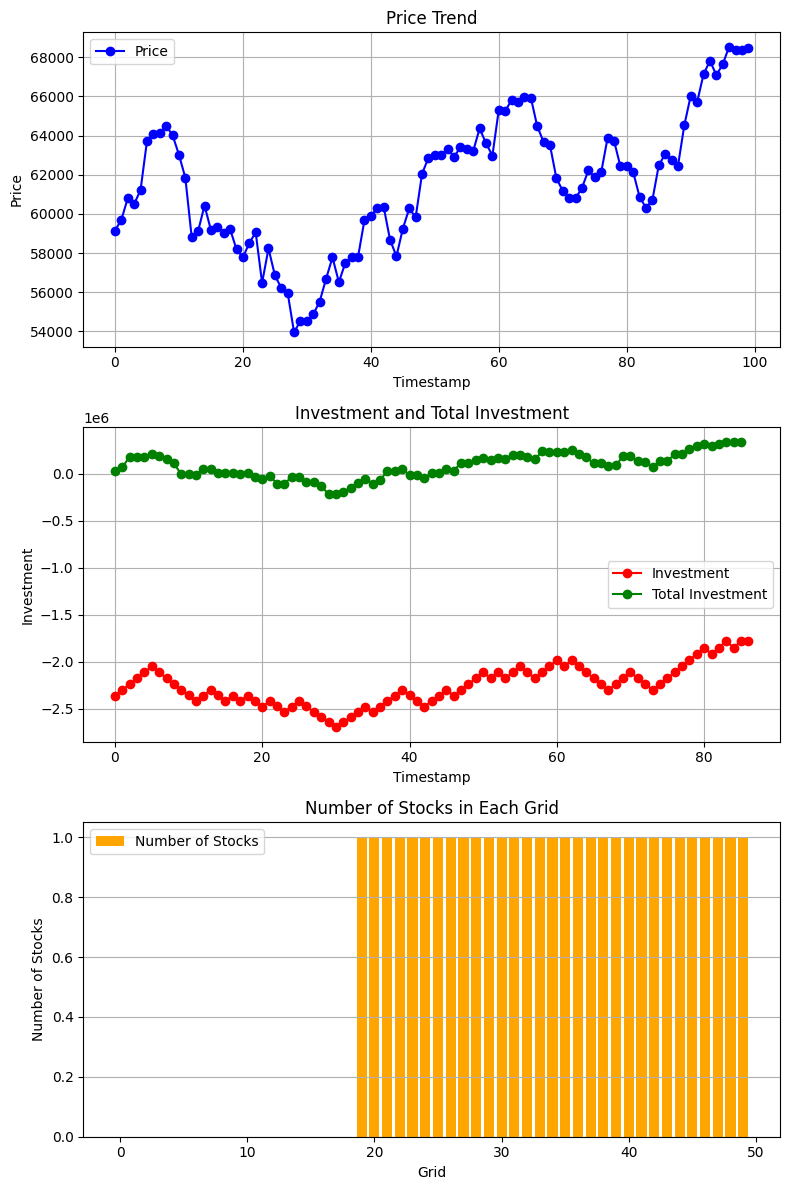

In [6]:
from src.grid_calculator import GridCalculator

grid_calc = GridCalculator(grid_config, prices)
grid_calc.generate_grid()

print("开始交易")
grid_calc.run(print_info=False)

grid_calc.conclusion()

In [ ]:
from src.GridStrategy import GridStrategy

strategy = GridStrategy(grid_config, prices)
print("网格价格:", strategy.grid_prices)
print("中位数价格:", strategy.grid_median_price)
print("网格持仓股票数量:", strategy.grid_stocks)
print("当前股票数量:", strategy.hold_stocks)
print("平均持仓成本:", strategy.average_hold_price)
print("爆仓线:", strategy.break_line)
strategy.run_strategy()
# strategy.plot_results()



每网格购买的股票量: 0.0026666666666666666
网格价格: [50000.0, 51020.4081632653, 52040.816326530614, 53061.22448979592, 54081.63265306123, 55102.04081632653, 56122.448979591834, 57142.857142857145, 58163.26530612245, 59183.67346938775, 60204.08163265306, 61224.489795918365, 62244.897959183676, 63265.30612244898, 64285.71428571429, 65306.12244897959, 66326.5306122449, 67346.9387755102, 68367.3469387755, 69387.75510204081, 70408.16326530612, 71428.57142857142, 72448.97959183673, 73469.38775510204, 74489.79591836735, 75510.20408163266, 76530.61224489796, 77551.02040816327, 78571.42857142858, 79591.83673469388, 80612.24489795919, 81632.6530612245, 82653.0612244898, 83673.4693877551, 84693.87755102041, 85714.28571428571, 86734.69387755102, 87755.10204081633, 88775.51020408163, 89795.91836734694, 90816.32653061225, 91836.73469387754, 92857.14285714286, 93877.55102040817, 94897.95918367346, 95918.36734693879, 96938.77551020408, 97959.18367346938, 98979.5918367347, 100000.0]
中位数价格: 75000.0
网格持仓股票数量: [0.0026

### 4.可视化模型

In [5]:
strategy.grid_stock_amount

0.0026666666666666666